In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [2]:
df=pd.read_csv("C:\\Users\\firas\\Downloads\\euro2024_players.csv")
df


,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


In [3]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [4]:
df.tail()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic
622,Tomas Chory,Centre-Forward,29,FC Viktoria Plzen,199,right,3,2,3200000,Czech Republic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,623.0,2.704013e+01,4.124275e+00,16.0,24.0,27.0,30.0,41.0
Height,623.0,1.841814e+02,6.569258e+00,167.0,180.0,185.0,189.0,202.0
Caps,623.0,3.033868e+01,3.098790e+01,0.0,7.0,21.0,42.0,206.0
Goals,623.0,4.152488e+00,1.008680e+01,0.0,0.0,1.0,4.0,128.0
MarketValue,623.0,1.840903e+07,2.426195e+07,50000.0,2900000.0,9000000.0,25000000.0,180000000.0


In [7]:
df.shape

(623, 10)

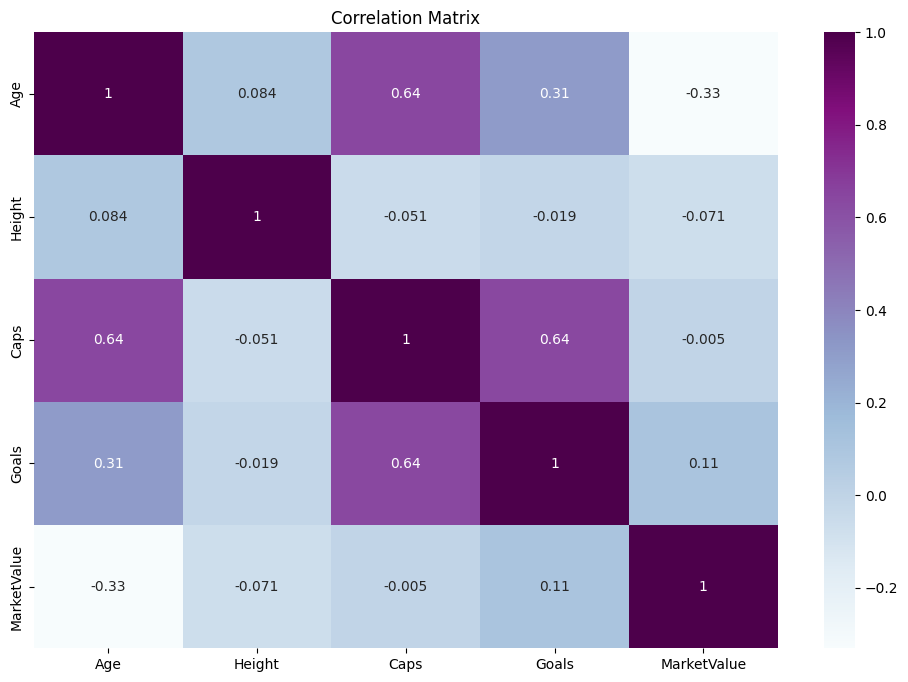

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

                    Name     Position  Age                 Club  Height  \
0  Marc-André ter Stegen   Goalkeeper   32         FC Barcelona     187   
1           Manuel Neuer   Goalkeeper   38        Bayern Munich     193   
2         Oliver Baumann   Goalkeeper   34  TSG 1899 Hoffenheim     187   
3     Nico Schlotterbeck  Centre-Back   24    Borussia Dortmund     191   
4           Jonathan Tah  Centre-Back   28  Bayer 04 Leverkusen     195   

    Foot  Caps  Goals  MarketValue  Country  
0  right    40      0     28000000  Germany  
1  right   119      0      4000000  Germany  
2  right     0      0      3000000  Germany  
3   left    12      0     40000000  Germany  
4  right    25      0     30000000  Germany  


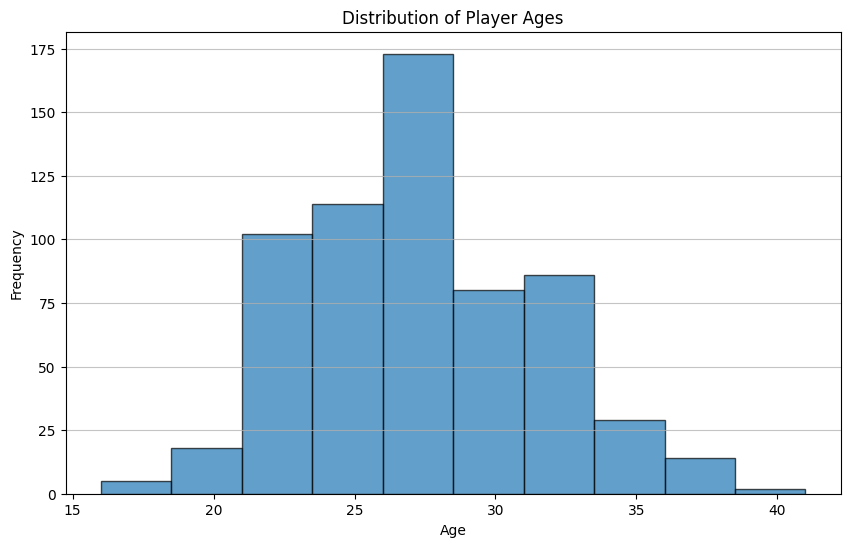

In [10]:
# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Create a histogram for the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

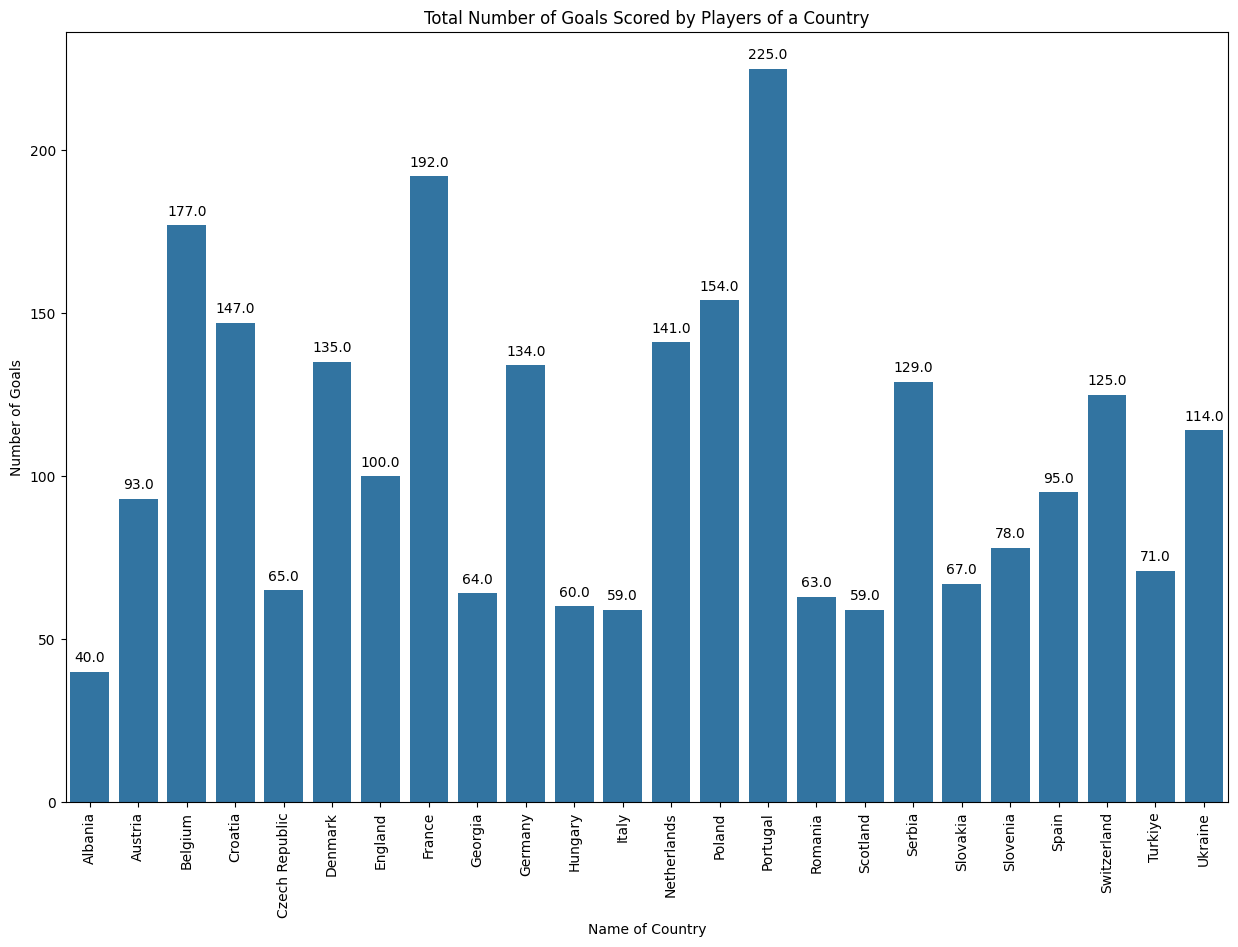

In [11]:
df_grouped = df.groupby('Country').sum().reset_index()
plt.figure(figsize=(15, 10))  
goalplot = sns.barplot(x='Country', y='Goals', data=df_grouped)
plt.title('Total Number of Goals Scored by Players of a Country')
plt.xlabel('Name of Country')
plt.ylabel('Number of Goals')

for p in goalplot.patches:
    goalplot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

plt.xticks(rotation=90)  
plt.show()

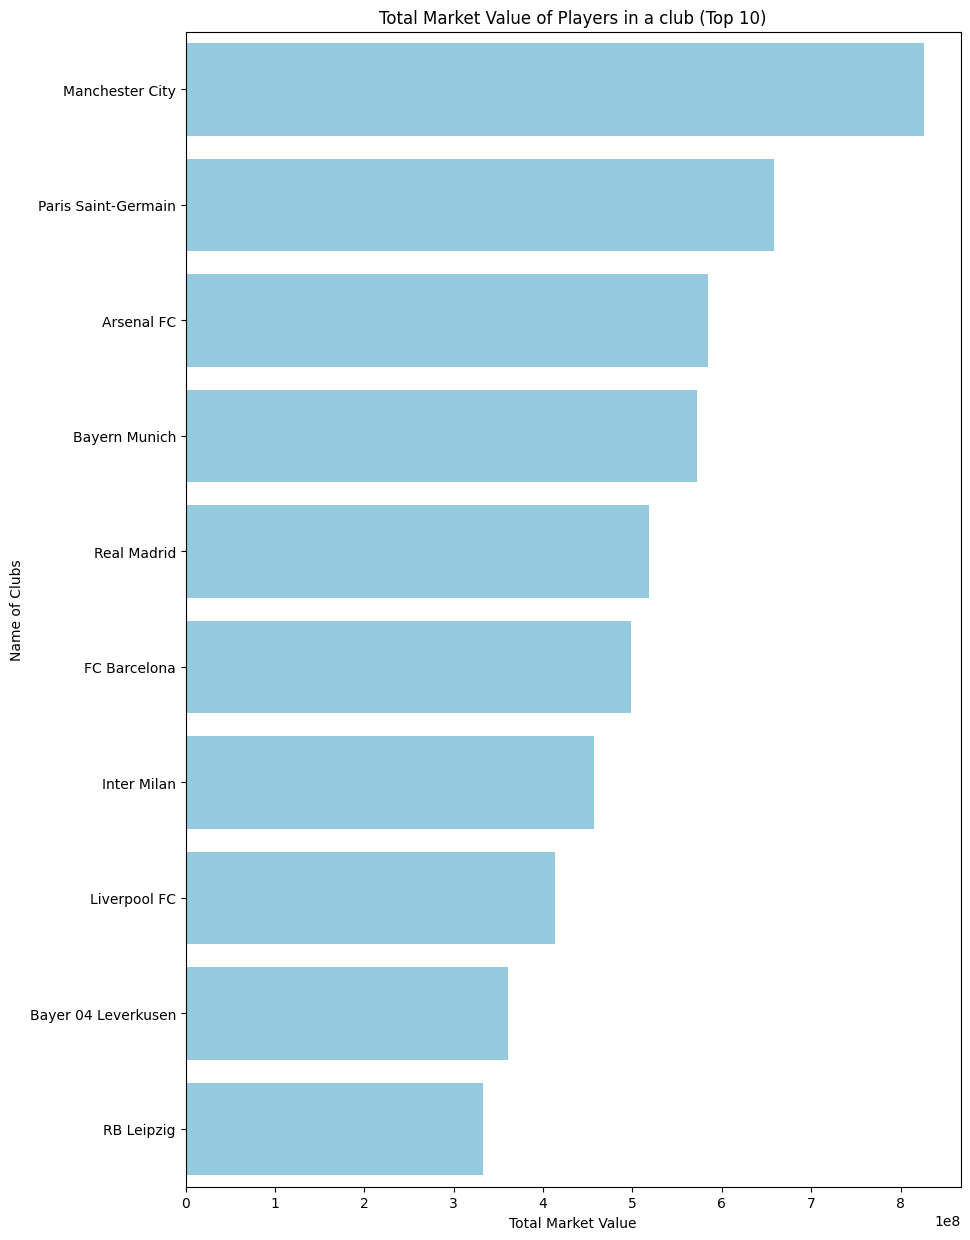

In [12]:
# Assuming 'df' and necessary data are defined

data_group = df.groupby('Club').sum().reset_index()
top_10_clubs = data_group.sort_values(by='MarketValue', ascending=False).head(10)

plt.figure(figsize=(10, 15))

# Specify color parameter to change bar colors
sns.barplot(x='MarketValue', y='Club', data=top_10_clubs, color='skyblue')

plt.title('Total Market Value of Players in a club (Top 10)')
plt.xlabel('Total Market Value')
plt.ylabel('Name of Clubs')
plt.show()

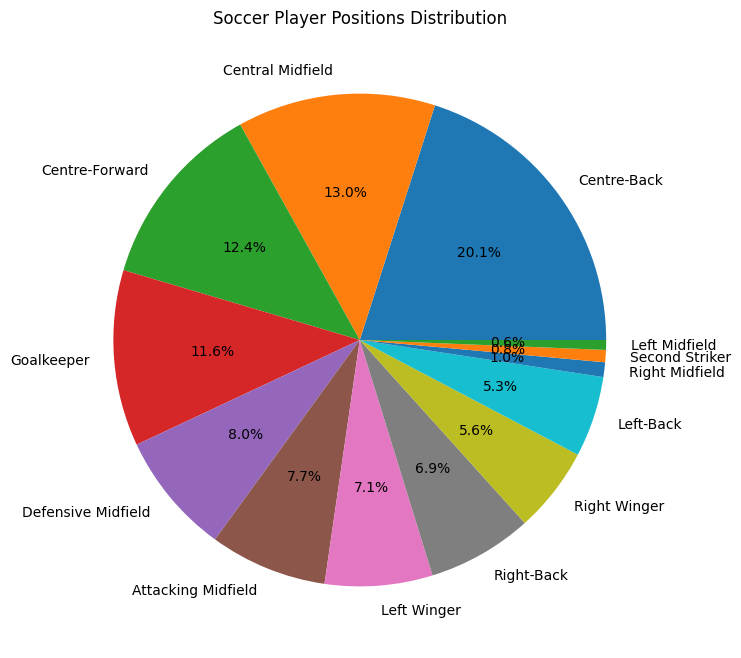

In [13]:
# Get number of players in each position
player_count = df['Position'].value_counts()

# Configure plot
plt.figure(figsize=(8, 8))
plt.pie(player_count, labels=player_count.index, autopct="%1.1f%%")
plt.title("Soccer Player Positions Distribution")
plt.show()

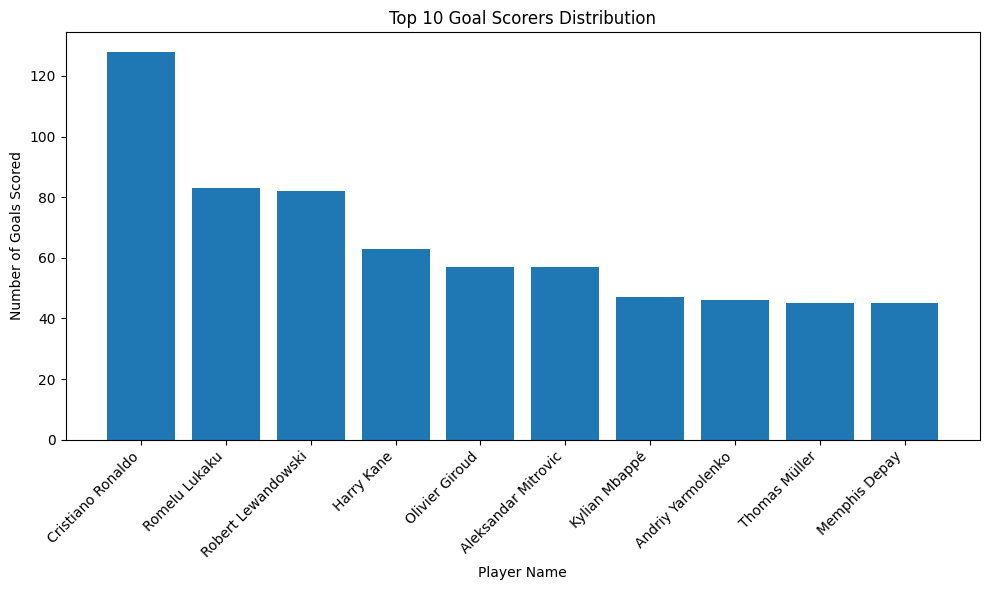

In [14]:
# Sort dataframe by goals
df_sorted = df.sort_values(by=['Goals'], ascending=False)

# Get top 10 goalscorers
top_10_scorers = df_sorted.head(10)

# Configure plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_scorers['Name'], top_10_scorers['Goals'])
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.title("Top 10 Goal Scorers Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

(-0.5, 799.5, 399.5, -0.5)

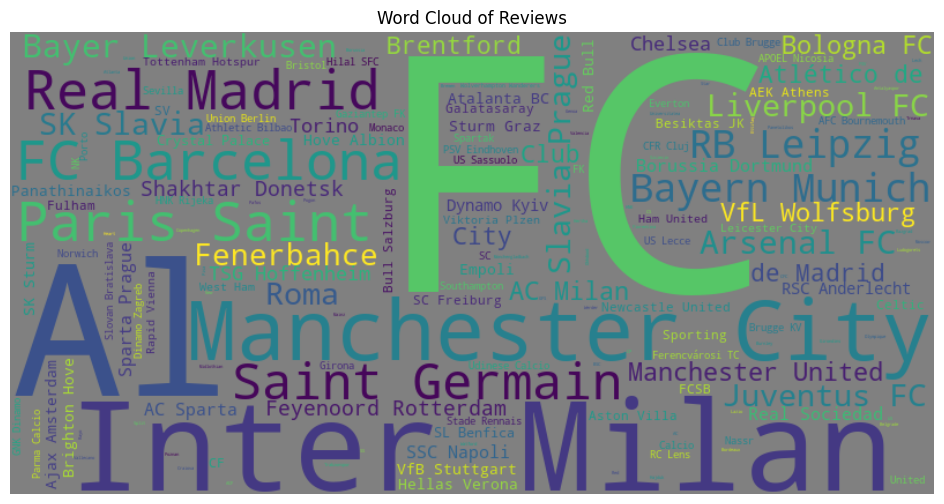

In [19]:
from wordcloud import WordCloud
reviews_text = ' '.join(df['Club'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')